In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
m = 2
a = 0.001
C = np.ones(m+1)/(m+1)

def f(x,z):
    return x**2*z+x

def ODE(t,y):
    y[1] = C @ y[2:] # This might have to be moved to the bottom
    ydot = np.zeros(m+3)
    ydot[0] = f(y[0],y[1])
    A = get_A(m)
    B = get_B(m,a)
    ydot[2:] = a * A @ y[2:] + B * y[0] # Zdot = ydot[2:] and Z = y[2:]
    return ydot

def get_B(m,a):
    B = np.zeros(m+1)
    B[0] = a
    return B

def get_A(m):
    d = -1 * np.ones(m+1)
    l = np.ones(m)
    return np.diag(d)+np.diag(l,-1)



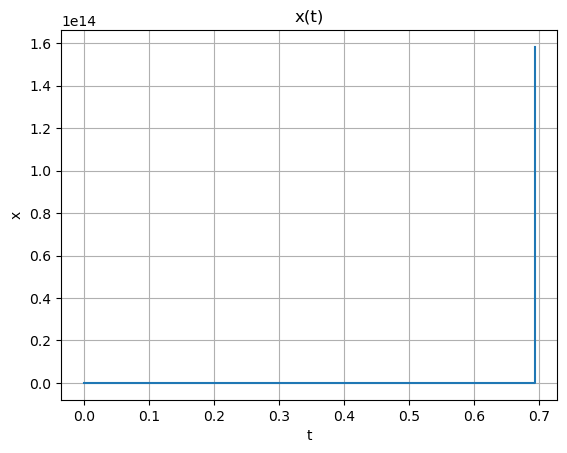

In [53]:
y0 = np.ones(m+3) # Initial conditions
t_span = (0.0, 30.0) # Simulation window

# Solve
solution = solve_ivp(
    fun=lambda t, y: ODE(t, y),
    t_span=t_span,
    y0=y0,
    method="RK45",   # ode45 equivalent
    rtol=1e-6,
    atol=1e-6
)

T = solution.t
Y = solution.y.T

# Plot
plt.plot(T,Y[:,0])
plt.xlabel("t")
plt.ylabel("x")
plt.title("x(t)")
plt.grid(True)